<a href="https://colab.research.google.com/github/Soulfex/Anomaly_detection/blob/main/Anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea ciudades y caracterizaciones en función de distancias

### 1. Importamos librerias

In [ ]:
! pip install matplotlib_scalebar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
from matplotlib import style
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
from tqdm import tqdm

### 2. Abrimos los datos

In [ ]:
df = pd.read_csv("C:\\Users\\52554\\Downloads\\MXcities_gt_10000.csv", header = None, sep ="\t", names = ["Latitud", "Longitud"])
df_names = pd.read_csv("C:\\Users\\52554\\Downloads\\name_MXcities_gt_10000.csv", header = None, sep ="\t")

In [ ]:
df["Nombres"] = df_names[0]

In [ ]:
df

,Altitud,Longitud,Nombres
0,0.603244,0.460621,Gustavo A. Madero
1,0.623385,0.569956,San Fernando
2,0.608631,0.646459,Gustavo Díaz Ordaz
3,0.592009,0.290783,Zumpango
4,0.577937,0.172304,Zumpango del Río
...,...,...,...
1014,0.242132,0.476146,Las Veredas
1015,0.597306,0.267320,Profesor Carlos Hank González
1016,0.592559,0.292577,Fraccionamiento la Trinidad
1017,0.671709,0.139424,Santa Cruz Amilpas


array([[<AxesSubplot:title={'center':'Altitud'}>,
        <AxesSubplot:title={'center':'Longitud'}>]], dtype=object)

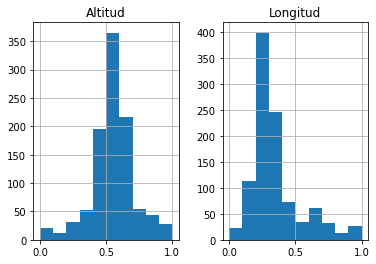

In [ ]:
df.hist()

In [ ]:
df.describe()

,Altitud,Longitud
count,1019.000000,1019.000000
mean,0.556161,0.349051
std,0.160626,0.186885
min,0.000000,0.000000
25%,0.477035,0.248557
50%,0.580935,0.292577
75%,0.620963,0.373414
max,1.000000,1.000000


### 3. Graficamos 

Text(0.5, 1.0, 'Ciudades México')

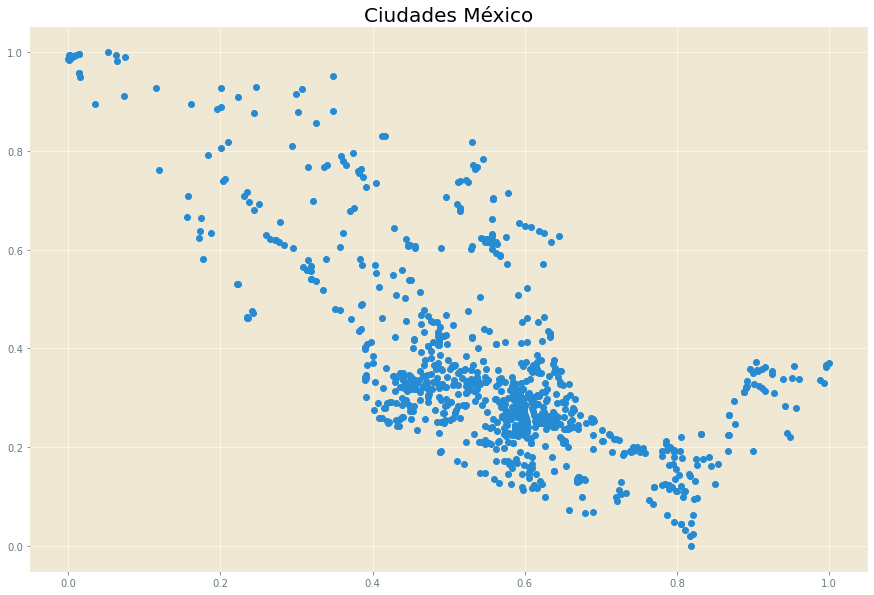

In [ ]:
plt.figure(figsize =(15, 10))
plt.style.use('Solarize_Light2')
plt.scatter(df["Altitud"], df["Longitud"] )
plt.title('Ciudades México', fontsize = 20)

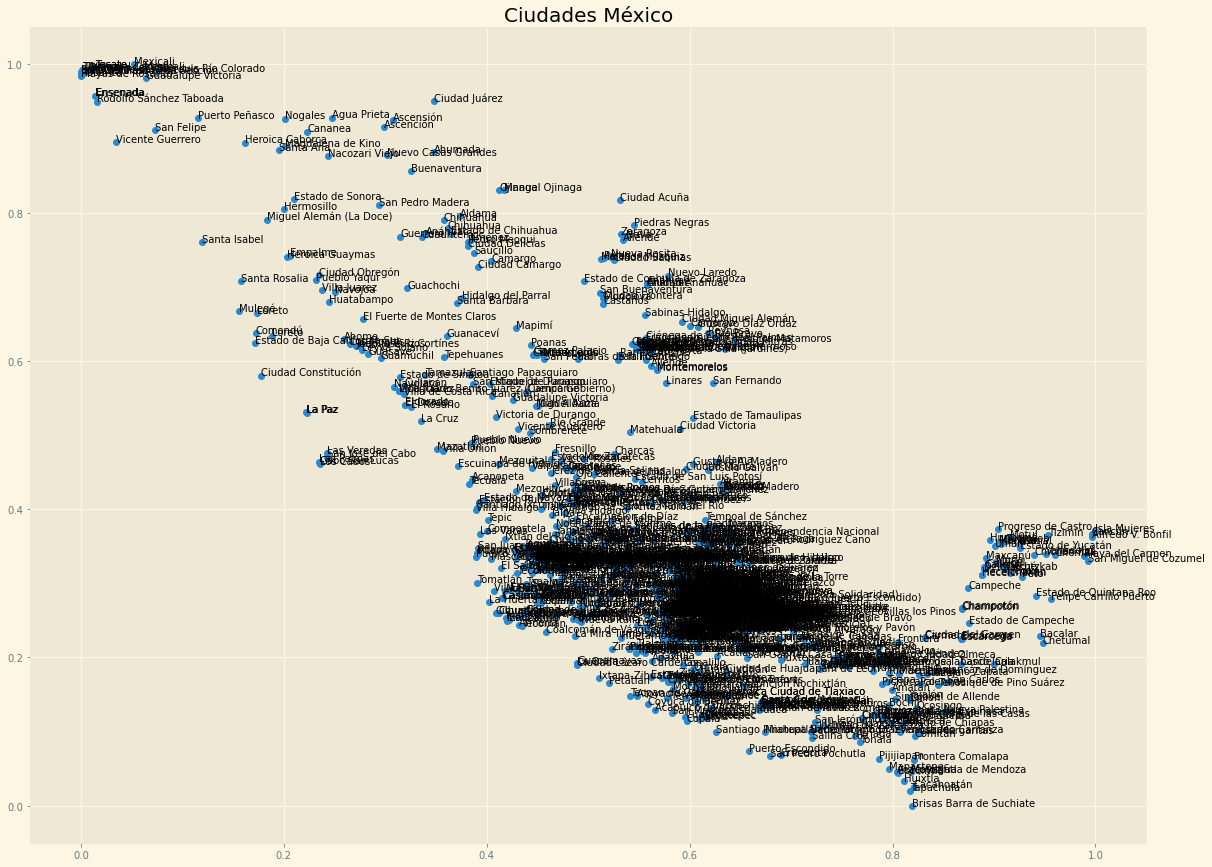

In [ ]:
fig, ax = plt.subplots(figsize = (20,15))
plt.style.use('Solarize_Light2')
labels = df['Nombres']
plt.title('Ciudades México', fontsize = 20)
ax.scatter(df["Altitud"], df["Longitud"] )
for i in range(len(df)):
    ax.annotate(df["Nombres"][i], (df["Altitud"][i], df["Longitud"][i]))
    


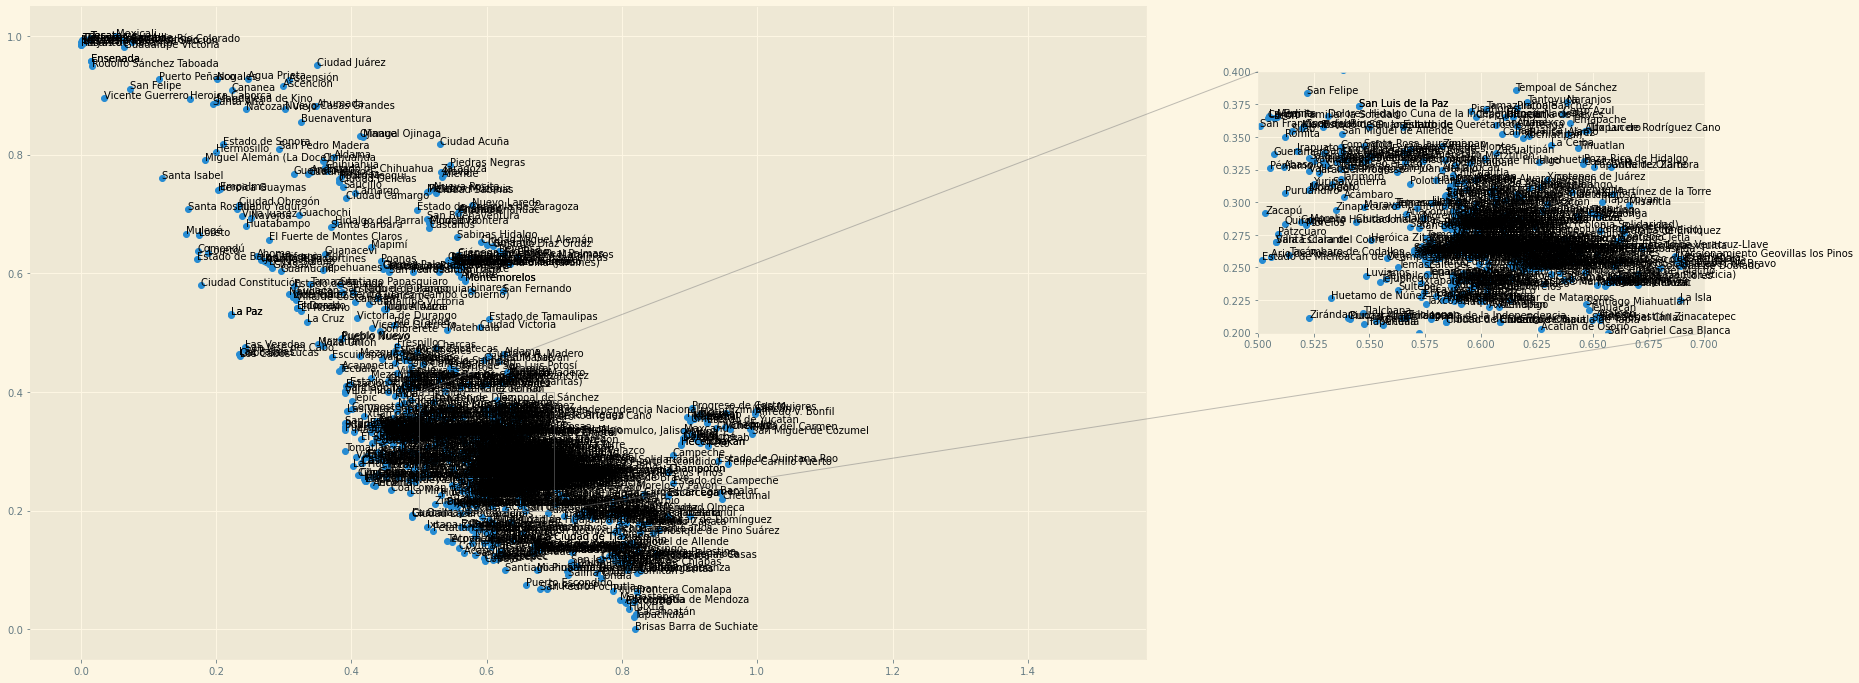

In [ ]:
fig, ax = plt.subplots(figsize = (20, 12))
axins = ax.inset_axes([1.1, 0.5, 0.4, 0.4])
axins.set(xlim=(0.5, 0.7), ylim=(0.2, 0.4))
ax.indicate_inset_zoom(axins)
ax.scatter(df["Altitud"], df["Longitud"])
axins.scatter(df["Altitud"], df["Longitud"])
for i in range(len(df)):
    ax.annotate(df["Nombres"][i], (df["Altitud"][i], df["Longitud"][i]))
    axins.annotate(df["Nombres"][i], (df["Altitud"][i], df["Longitud"][i]))



### 4. Para cada ciudad v encontrar la distancia esperada al resto de las ciudades, E(v).

In [ ]:
# definimos nuestra función de distancia
def euclideanDistance(x1, y1, x2, y2):
    distancia = math.sqrt((x2-x1)**2+(y2-y1)**2)
    return distancia

E = []
mini = []
mini2 = []
maxi = []
indices = []
indices2 = []
#listas = []
for i in tqdm(range(len(df))):
    vals = []
  
    for j in range(len(df)):
        if(i == j ):
            pass
        else:
            d = euclideanDistance(df['Altitud'][i], df['Longitud'][i], df['Altitud'][j], df['Longitud'][j])
            vals.append(d)
            
    #listas.append(vals)        
    tmp = min(vals)
    indices.append(vals.index(tmp))   
    mini.append(min(vals))
    vals.pop(vals.index(tmp))
    # Llenamos la segunda lista de distancias minimas 
    
    tmp2 = min(vals)
    mini2.append(min(vals))
    indices2.append(vals.index(tmp2))
    
    maxi.append(max(vals)) 
    mean = statistics.mean(vals)
    E.append(mean)
            
        


    
   



100%|█████████████████████████████████████████████████████████████████████████████| 1019/1019 [00:39<00:00, 26.06it/s]


Text(0.5, 1.0, 'E[v] vs m[v]')

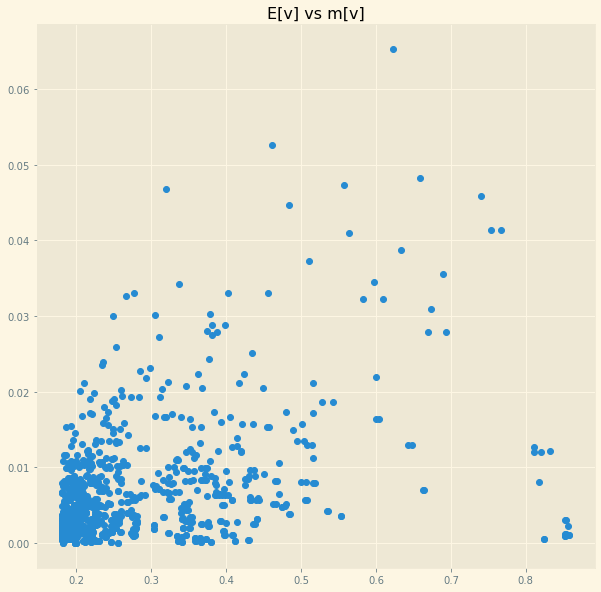

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(E, mini)
plt.title('E[v] vs m[v]')

Text(0.5, 1.0, 'E[v] vs M[v]')

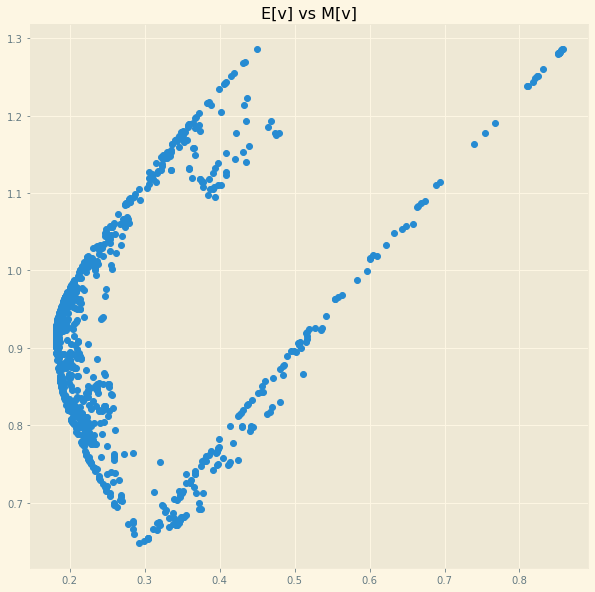

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(E, maxi)
plt.title('E[v] vs M[v]')

Text(0.5, 1.0, 'm[v] vs M[v]')

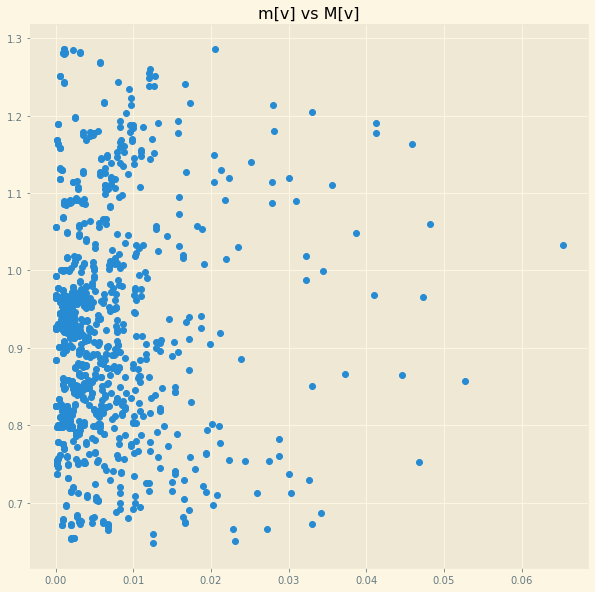

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(mini, maxi)
plt.title('m[v] vs M[v]')

Text(0, 0.5, 'Número de ciudades')

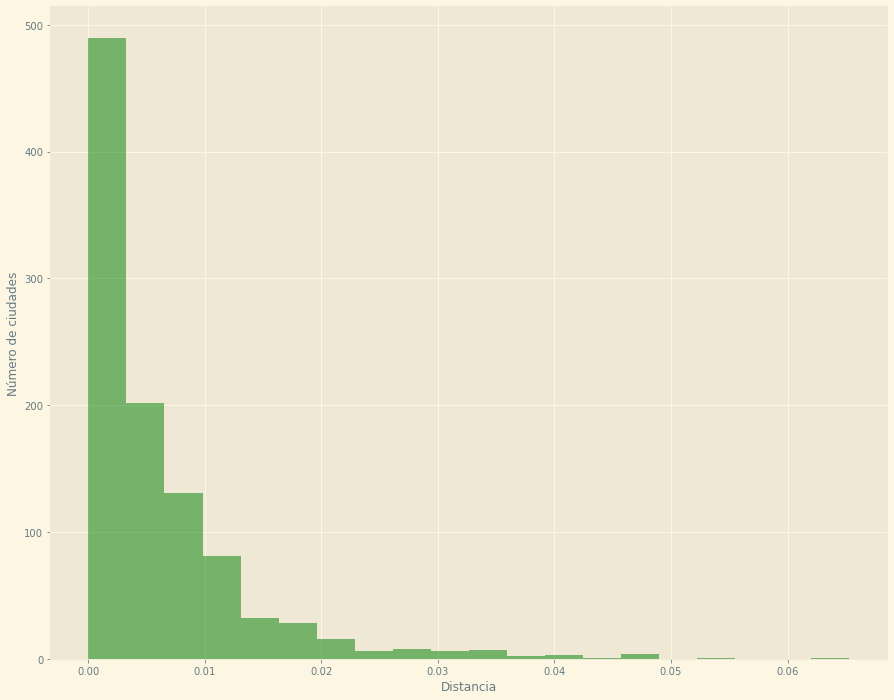

In [ ]:
plt.figure(figsize=(15,12))
plt.hist(mini, 20,  histtype ='bar', color='g', alpha=0.5)
plt.xlabel("Distancia")
plt.ylabel("Número de ciudades")

Text(0, 0.5, 'Número de ciudades')

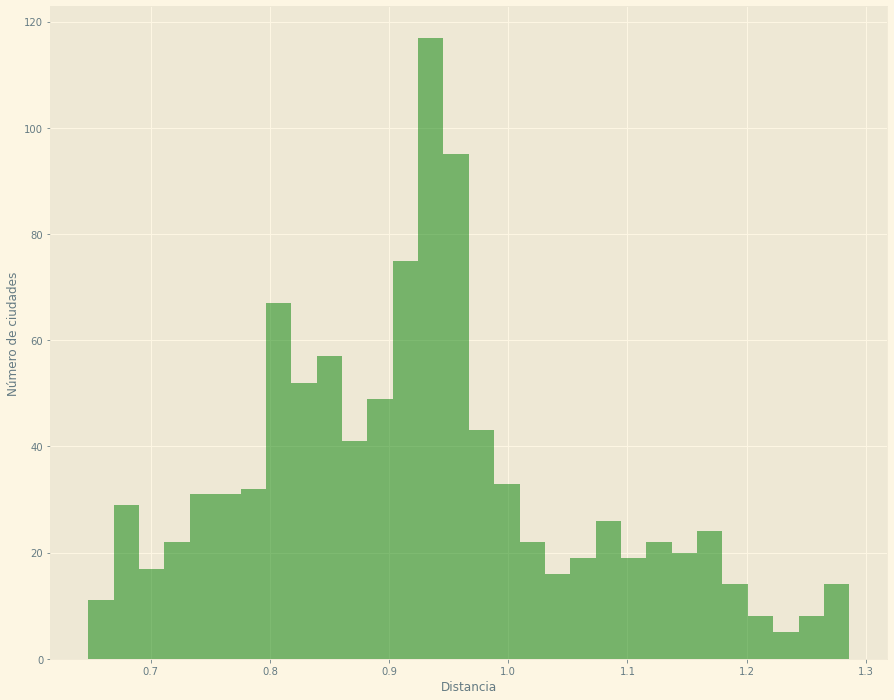

In [ ]:
plt.figure(figsize=(15,12))
plt.hist(maxi, 30,  histtype ='bar', color='g', alpha=0.5)
plt.xlabel("Distancia")
plt.ylabel("Número de ciudades")

Text(0, 0.5, 'Número de ciudades')

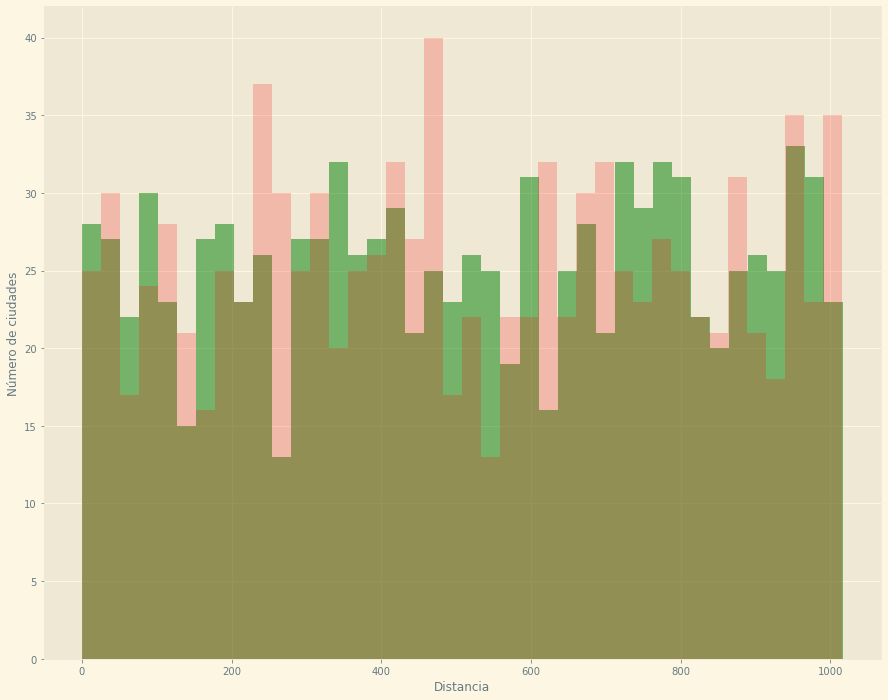

In [ ]:
plt.figure(figsize=(15,12))
plt.hist(indices, 40,  histtype ='bar', color='g', alpha=0.5)
plt.hist(indices2, 40,  histtype ='bar', color='r', alpha=0.2)
plt.xlabel("Distancia")
plt.ylabel("Número de ciudades")

In [ ]:
def most_frequent(List): 
    return max(set(List), key = List.count) 
  

print(most_frequent(indices)) 

523


In [ ]:
print(most_frequent(indices2))

808


In [ ]:
df['Nombres'][523]

'Santa Anita'

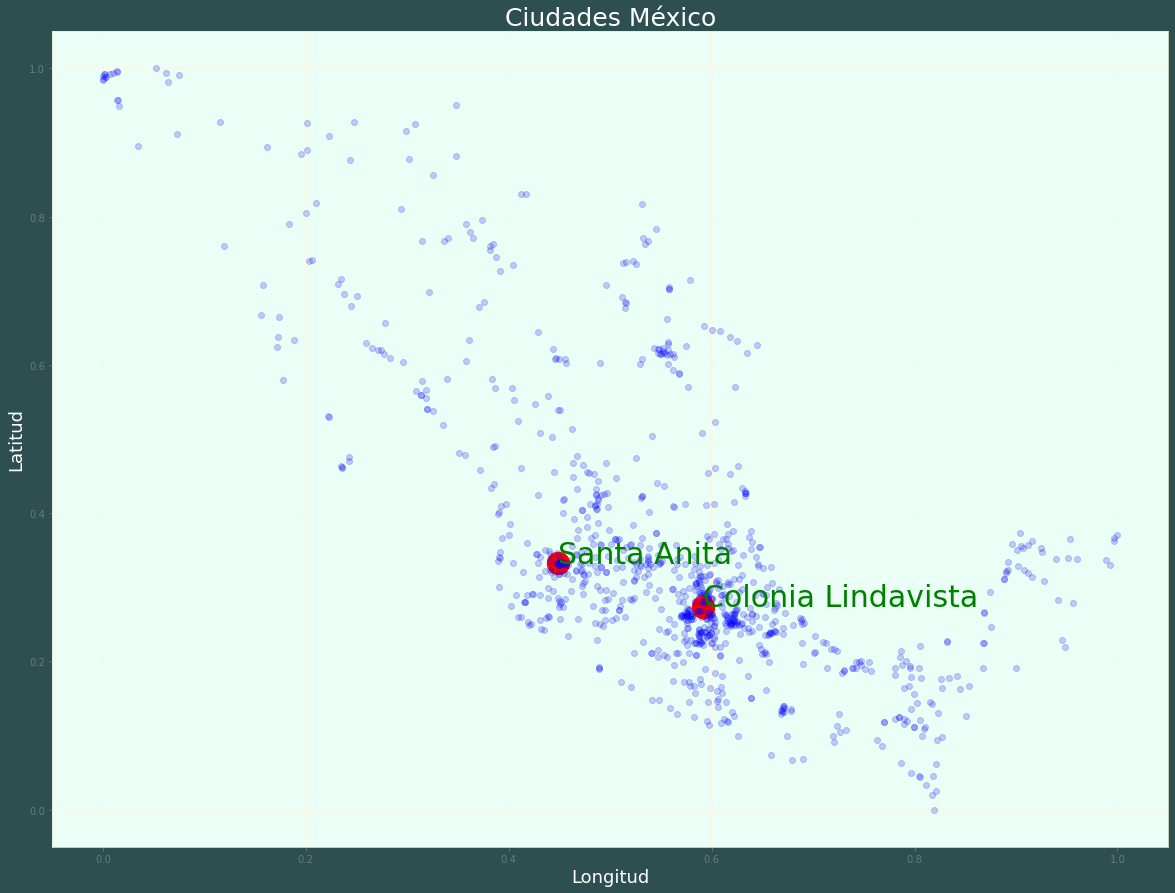

In [ ]:
fig, ax = plt.subplots(facecolor=(.18, .31, .31), figsize = (20, 15))
labels = df['Nombres']
ax.set_facecolor('#eafff5')
ax.set_xlabel('Longitud', fontsize = 18, color = "w")
ax.set_ylabel('Latitud', fontsize = 18, color = "w")
ax.set_title('Ciudades México', fontsize = 25, color = "w")
for i in range(len(df)):
    if(i == 523):
        ax.scatter(df["Altitud"][i], df["Longitud"][i], color = 'r', s = 500 )
        ax.annotate(df["Nombres"][i], (df["Altitud"][i], df["Longitud"][i]), fontsize = 30, color = 'g')
    if(i == 808):
        ax.scatter(df["Altitud"][i], df["Longitud"][i], color = 'r', s = 500 )
        ax.annotate(df["Nombres"][i], (df["Altitud"][i], df["Longitud"][i]), fontsize = 30, color = 'g')
    else:    
        ax.scatter(df["Altitud"][i], df["Longitud"][i], color = 'b', alpha = 0.2 )

In [ ]:
indices[286]

360

Text(0.5, 1.0, 'm[v] vs m2[v]')

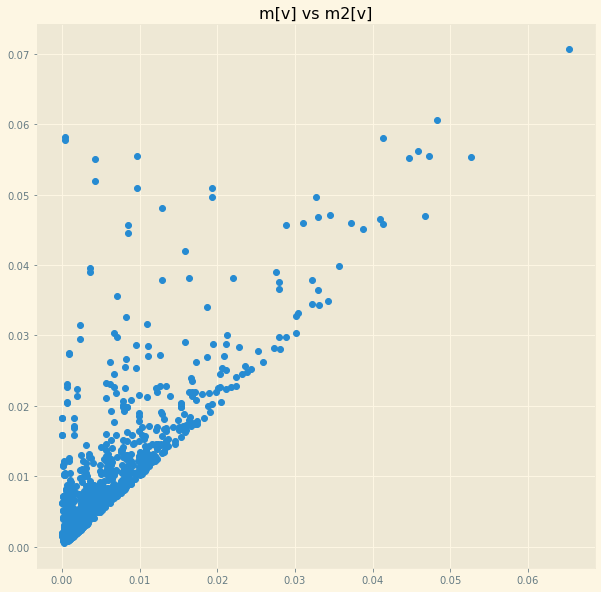

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(mini, mini2)
plt.title('m[v] vs m2[v]')

#### ¿Existen anomalías de acuerdo a las distribución de las ciudades en los espacios definidos por las variables E(v), m(v), M(v), m2(v) y por su presencia en Lk1st y Lk2nd?

- Obeservando la ultima grafica presentada de m[v] vs m2[v] podemos decir que existe una ciudad que aparentemente queda extremanadamente lejos de todas. 


- Al obeneter la primera y segunda ciudades más cercanas que son más frecuentes podemos observar que son ciudades centricas.

